# Logistic Regression from first principles

### In this code I implement Logistic Regression from scratch and compare it the model from sklearn

In [105]:
# import the packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

## Read In Data

In [106]:
# read in the dataset which i got from kaggle
data = pd.read_csv('wine.csv')

In [107]:
# explore the dataset
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [109]:
# change the quality to binary values for ease
data['quality'] = data['quality'].map({'bad': 0, 'good': 1,})

In [110]:
# check that it is binary
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## Visualise the data and boundary

In [111]:
# set our features and data
# i am using only two features so that we can easily visualise the algorithm
X = np.array(data[['volatile acidity','alcohol']].values)
y = np.array(data['quality'].values)

In [112]:
# assign good and bad to the target variable
good = data.loc[y == 1]
bad = data.loc[y==0]

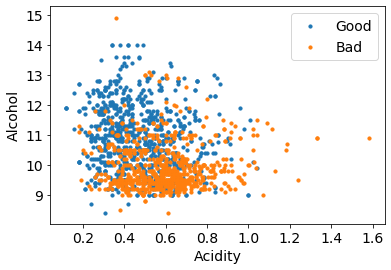

In [115]:
# plot the data to visualise a boundary
plt.scatter(good.iloc[:, 1], good.iloc[:, 10], s=10, label='Good')
plt.scatter(bad.iloc[:, 1], bad.iloc[:, 10], s=10, label='Bad')
plt.legend(fontsize=14)
plt.xlabel('Acidity',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Alcohol', fontsize=14)
plt.show()

## Modelling 

In [116]:
# sigmoind function so we can have 0 < x < 1 outputs
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [117]:
# model function 
def model(X, y, alpha, epochs):
    
    # m -> number of exampls
    # n -> number of features
    
    m = X.shape[0]
    n = X.shape[1]
    
    y = y.reshape(m,1)
    
    # initialise weights and biases
    theta = np.zeros((n,1))
    b = 0
    
    # cost list
    J = []

    for i in range(epochs):
        
        # compute hypothesis
        h = sigmoid( np.dot(X, theta) + b)

        # perform gradients to update weights and biases
        dt = (1/m) * np.dot(X.T, (h-y))
        db = (1/m)* np.sum((h - y)) 
        
        # update the values
        theta = theta - alpha*dt
        b = b - alpha*db

        # calculate cost and add it to the list
        cost = (-1/m) * np.sum(y*np.log(h) + (1-y) * np.log(1-h))
        J.append(cost)
        
    return theta, b, J

In [ ]:
# set learning parameters
alpha = 0.01
epochs = 300000

# carry out the model
theta, b, J = model(X, y, alpha, epochs)

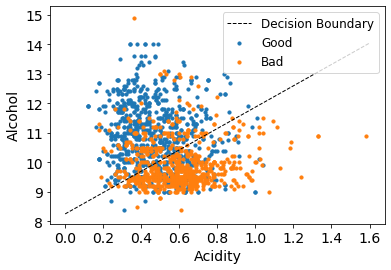

In [158]:
# Calculate the intercept and gradient of the decision boundary
c = -b/theta[1]
m = -theta[0]/theta[1]

# generate the line
xmin, xmax = 0, 1.6
ymin, ymax = 8, 15
xd = np.array([xmin, xmax])
yd = m*xd + c

# plot the line with the data
plt.plot(xd, yd, 'k', lw=1, ls='--',label='Decision Boundary')
plt.scatter(good.iloc[:, 1], good.iloc[:, 10], s=10, label='Good')
plt.scatter(bad.iloc[:, 1], bad.iloc[:, 10], s=10, label='Bad')
plt.legend(fontsize=12)
plt.xlabel('Acidity',fontsize=14)
plt.ylabel('Alcohol',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Model Evaluation

In [159]:
def acc(X,theta,b,y):
    
    # Calculating hypothesis
    h = sigmoid(np.dot(X, theta) + b)
    
    # Empty List to store predictions
    pred_class = []
    
    # if h >= 0.5 --> round up to 1
    # if h < 0.5 --> round to 0
    pred_class = [1 if i > 0.5 else 0 for i in h]
    
    accuracy = np.sum(y == pred_class) / len(y)
    
    return print('the accuracy is:', accuracy*100, '%')

acc(X,theta,b,y)

the accuracy is: 73.92120075046904 %


## Model from SKlearn

We will now use the in built packages and compare it to our first principles model

In [161]:
# start by splitting the data into test and train
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

# call the model and apply it the the train set
model = LogisticRegression(solver='newton-cg', C=1, random_state=1)
model.fit(x_train, y_train)
score = model.score(x_train, y_train)

print('Train Accuracy:', model.score(x_train, y_train))

Train Accuracy: 0.7333854573885848


The model has a similar accuracy!


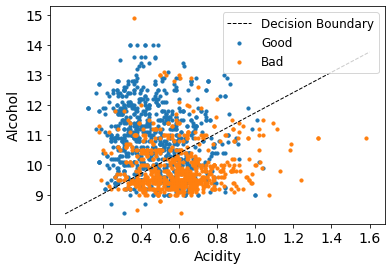

In [163]:
# retrieve the intercept and gradients
b = model.intercept_[0]
w1, w2 = model.coef_.T

# Calculate the intercept and gradient of the decision boundary like last time
c = -b/w2
m = -w1/w2

# generate the line like last time
xmin, xmax = 0, 1.6
ymin, ymax = 8, 15
xd = np.array([xmin, xmax])
yd = m*xd + c

# plot the data and boundary again
plt.plot(xd, yd, 'k', lw=1, ls='--',label='Decision Boundary')
plt.scatter(good.iloc[:, 1], good.iloc[:, 10], s=10, label='Good')
plt.scatter(bad.iloc[:, 1], bad.iloc[:, 10], s=10, label='Bad')
plt.legend(fontsize=12)
plt.xlabel('Acidity',fontsize=14)
plt.ylabel('Alcohol',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()